<a href="https://colab.research.google.com/github/et1812cda48/LR4.2/blob/main/Project_DeepSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Импорт библиотек:

In [ ]:
!pip install deep-search-engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.4/647.4 kB 30.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.2-cp310-cp310-linux_x86_64.whl size=582711 sha256=7c85b05f481c83e4f34c26481c8c3b201270c1ef4097fe7bff74e99bae15ecc4
  Stored in directory: /root/.cache/pip/wheels/7a/d9/59/473fa56df8e39430eeda369500b4e7127f5b243ba24c3c4297
Successfully built annoy


In [ ]:
from DeepSearch import DeepSearch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

Константы:

In [ ]:
img_width, img_height, img_num_colors = 512, 512, 3
img_shape = (img_width, img_height, img_num_colors)

Загрузка базы данных:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!unzip -o /content/drive/MyDrive/res_Selector.zip 

Streaming output truncated to the last 5000 lines.
  inflating: res_Selector/training/shirt men/640.png  
  inflating: res_Selector/training/shirt men/200 (3).jpg  
  inflating: res_Selector/training/shirt men/701.jpg  
  inflating: res_Selector/training/shirt men/886 (2).jpg  
  inflating: res_Selector/training/shirt men/292 (3).png  
  inflating: res_Selector/training/shirt men/238.jpg  
  inflating: res_Selector/training/shirt men/931.jpg  
  inflating: res_Selector/training/shirt men/1044 (3).jpg  
  inflating: res_Selector/training/shirt men/779 (4).jpg  
  inflating: res_Selector/training/shirt men/640 (4).jpg  
  inflating: res_Selector/training/shirt men/452.png  
  inflating: res_Selector/training/shirt men/222.png  
  inflating: res_Selector/training/shirt men/608 (4).jpg  
  inflating: res_Selector/training/shirt men/907 (2).jpg  
  inflating: res_Selector/training/shirt men/675 (3).png  
  inflating: res_Selector/training/shirt men/597 (2).jpg  
  inflating: res_Selector/tr

Изменение расположения изображений:

In [ ]:
if not os.path.exists('/content/DataSet'):
  os.mkdir('/content/DataSet')

for folder in os.listdir('/content/res_Selector/validation'):
  for file in os.listdir('/content/res_Selector/validation/' + folder):
    img = Image.open('/content/res_Selector/validation/' + folder + '/' + file)
    if os.path.exists('/content/DataSet/' + file):
      os.remove('/content/DataSet/' + file)
    img.save('/content/DataSet/' + file)

Функция для нахождения похожих элементов одежды:

In [ ]:
def search_elems(path, model='VGG16', n_trees=100, n_imgs=10, metric='angular'):
  deepSearch = DeepSearch(model_name=model, n_trees=n_trees, metric=metric)
  deepSearch.build('/content/DataSet')
  return deepSearch.get_similar_images(path, num_results=n_imgs, with_distance=True)

Функция, возвращающая основной цвет элемента одежды:

In [ ]:
def get_colour(img):
  return sorted(img.getcolors(img_width*img_height), reverse=True)[1][1]

Функция для поиска похожих по цвету элементов:

In [ ]:
def choose_clothers(colour, imgs, lim=20):
  img_list = []
  for img in imgs:
    color = get_colour(img)
    #print('Основной цвет элемента одежды:', color)
    if np.math.sqrt((colour[0] - color[0])**2 + (colour[1] - color[1])**2 + (colour[2] - color[2])**2) <= lim:
      img_list.append(img)
  return img_list

Примеры:

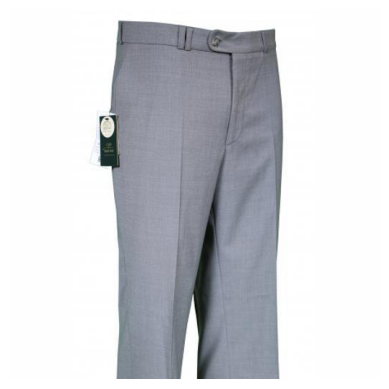

Основной цвет элемента одежды: (255, 255, 253)
model: VGG16; metric: angular
Found existing representations
No changes detected. No update required.
Found existing annoy index
Done. Please apply search now.
1/1 [==============================] - 1s 696ms/step


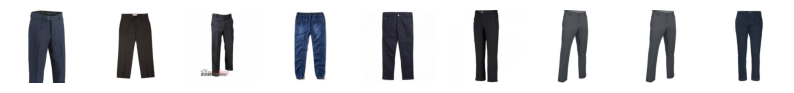



Селекция одежды по основному цвету:


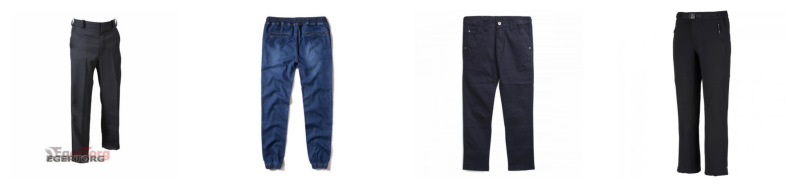

model: VGG16; metric: euclidean
Found existing representations
No changes detected. No update required.
Found existing annoy index
Done. Please apply search now.
1/1 [==============================] - 1s 763ms/step


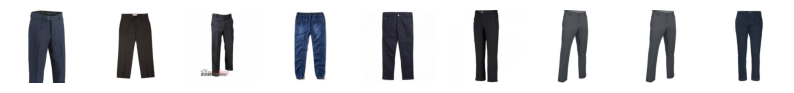



Селекция одежды по основному цвету:


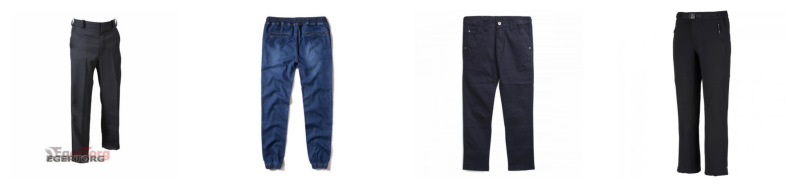

model: VGG16; metric: manhattan
Found existing representations
No changes detected. No update required.
Found existing annoy index
Done. Please apply search now.
1/1 [==============================] - 1s 690ms/step


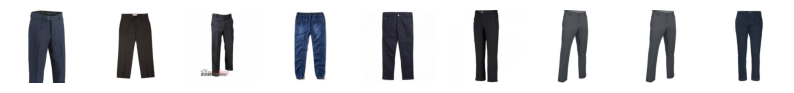



Селекция одежды по основному цвету:


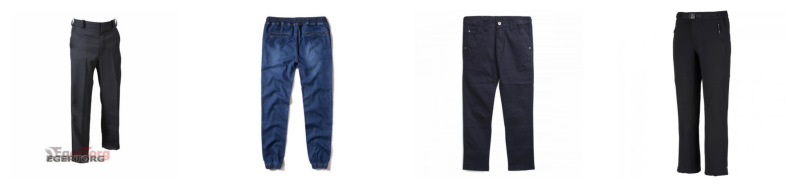

model: VGG16; metric: hamming
Found existing representations
No changes detected. No update required.
Found existing annoy index
Done. Please apply search now.
1/1 [==============================] - 1s 724ms/step


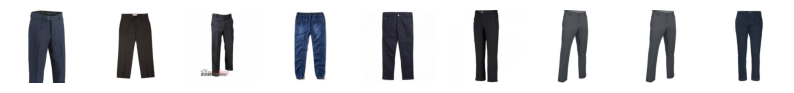



Селекция одежды по основному цвету:


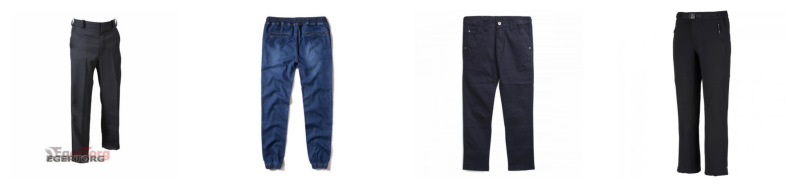

model: VGG16; metric: dot
Found existing representations
No changes detected. No update required.
Found existing annoy index
Done. Please apply search now.
1/1 [==============================] - 1s 672ms/step


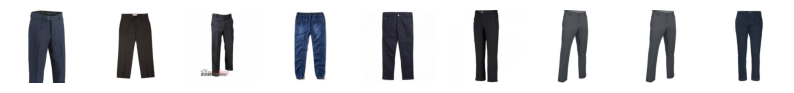



Селекция одежды по основному цвету:


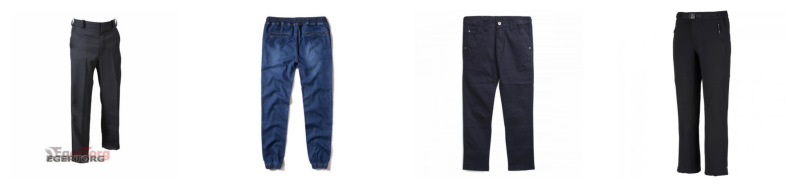

model: ResNet50; metric: angular
Found existing representations
No changes detected. No update required.
Found existing annoy index
Done. Please apply search now.
1/1 [==============================] - 1s 700ms/step


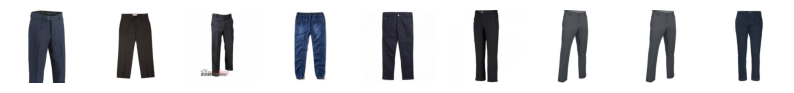



Селекция одежды по основному цвету:


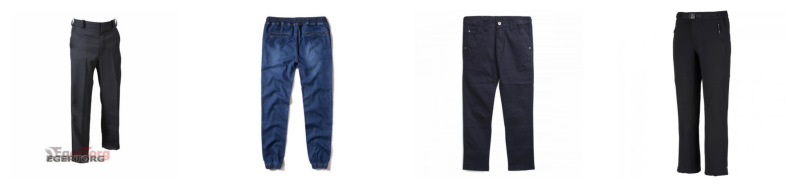

model: ResNet50; metric: euclidean
Found existing representations
No changes detected. No update required.
Found existing annoy index
Done. Please apply search now.
1/1 [==============================] - 1s 1s/step


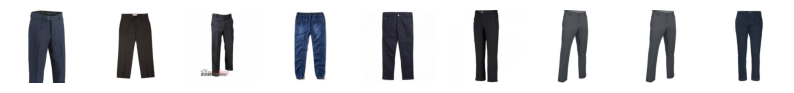



Селекция одежды по основному цвету:


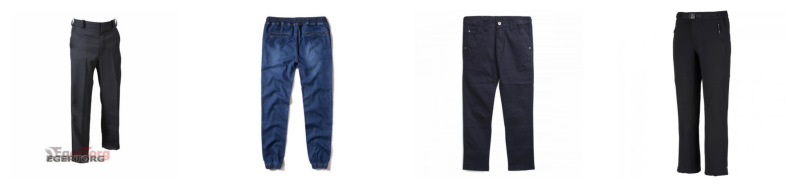

model: ResNet50; metric: manhattan
Found existing representations
No changes detected. No update required.
Found existing annoy index
Done. Please apply search now.
1/1 [==============================] - 1s 699ms/step


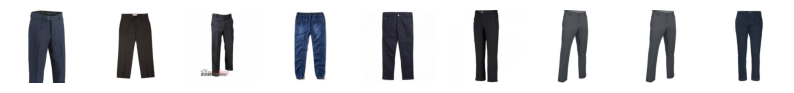



Селекция одежды по основному цвету:


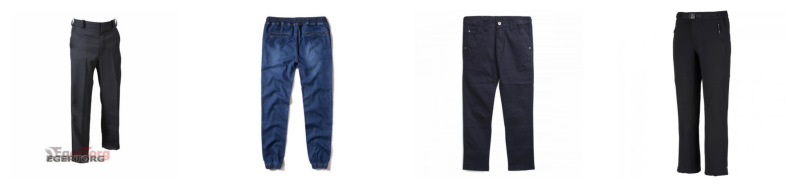

model: ResNet50; metric: hamming
Found existing representations
No changes detected. No update required.
Found existing annoy index
Done. Please apply search now.
1/1 [==============================] - 1s 690ms/step


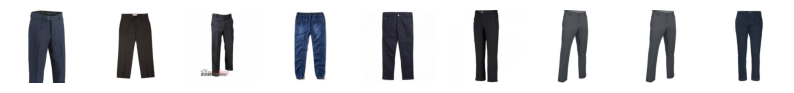



Селекция одежды по основному цвету:


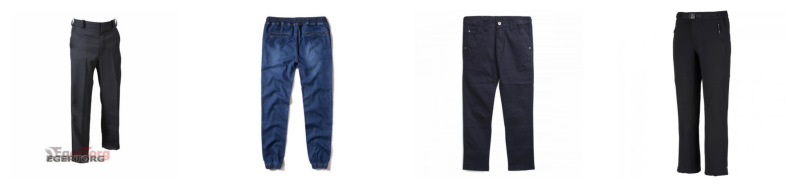

model: ResNet50; metric: dot
Found existing representations
No changes detected. No update required.
Found existing annoy index
Done. Please apply search now.
1/1 [==============================] - 1s 686ms/step


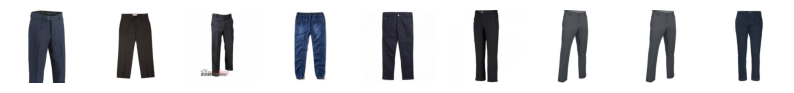



Селекция одежды по основному цвету:


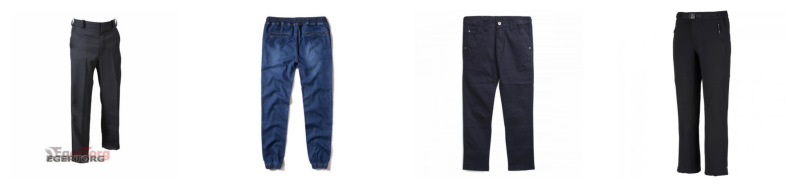

model: InceptionV3; metric: angular
Found existing representations
No changes detected. No update required.
Found existing annoy index
Done. Please apply search now.
1/1 [==============================] - 1s 684ms/step


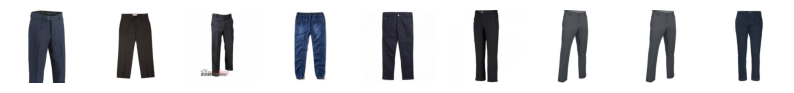



Селекция одежды по основному цвету:


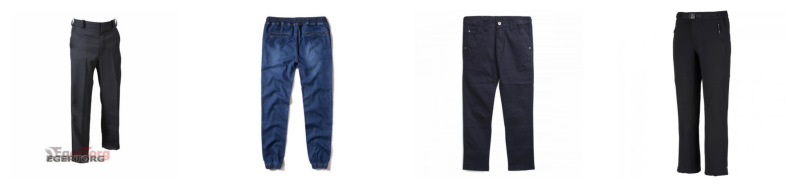

model: InceptionV3; metric: euclidean
Found existing representations
No changes detected. No update required.
Found existing annoy index
Done. Please apply search now.
1/1 [==============================] - 1s 1s/step


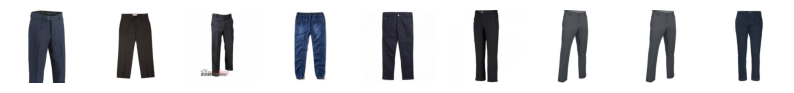



Селекция одежды по основному цвету:


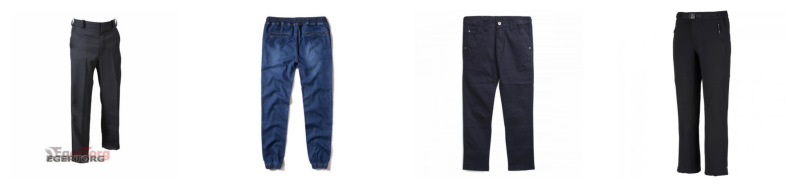

model: InceptionV3; metric: manhattan
Found existing representations
No changes detected. No update required.
Found existing annoy index
Done. Please apply search now.
1/1 [==============================] - 1s 681ms/step


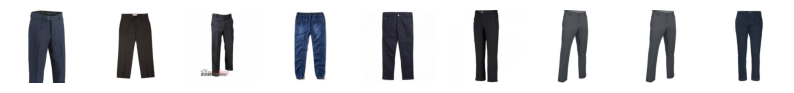



Селекция одежды по основному цвету:


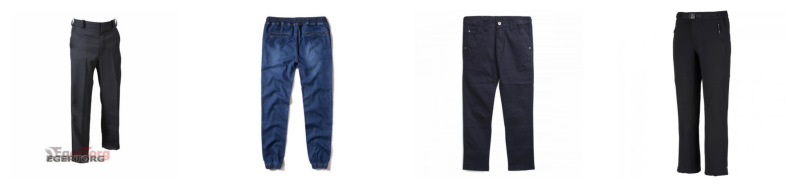

model: InceptionV3; metric: hamming
Found existing representations
No changes detected. No update required.
Found existing annoy index
Done. Please apply search now.
1/1 [==============================] - 1s 1s/step


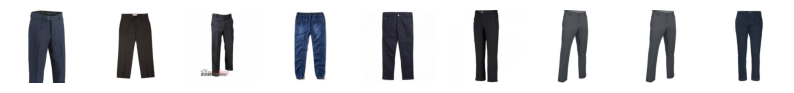



Селекция одежды по основному цвету:


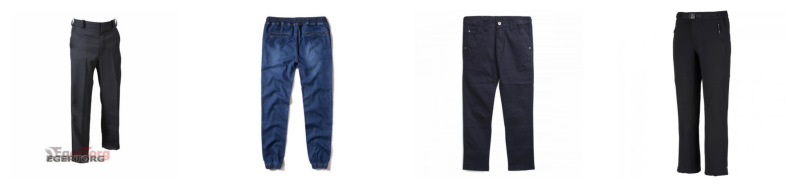

model: InceptionV3; metric: dot
Found existing representations
No changes detected. No update required.
Found existing annoy index
Done. Please apply search now.
1/1 [==============================] - 1s 659ms/step


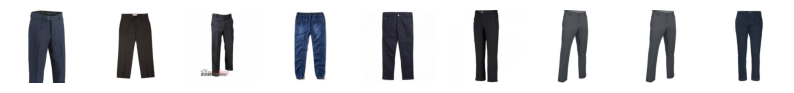



Селекция одежды по основному цвету:


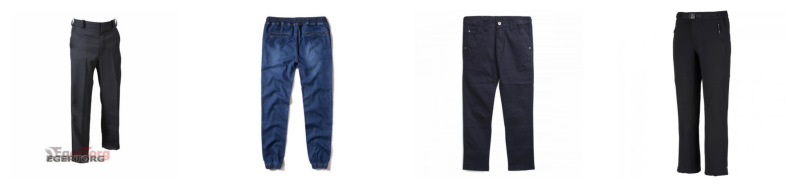

model: Xception; metric: angular
Found existing representations
No changes detected. No update required.
Found existing annoy index
Done. Please apply search now.
1/1 [==============================] - 1s 686ms/step


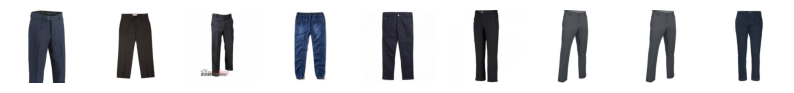



Селекция одежды по основному цвету:


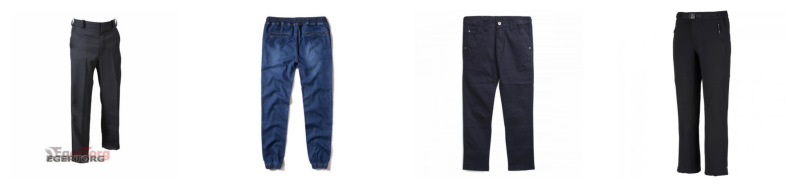

model: Xception; metric: euclidean
Found existing representations
No changes detected. No update required.
Found existing annoy index
Done. Please apply search now.
1/1 [==============================] - 1s 720ms/step


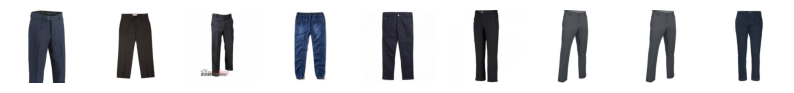



Селекция одежды по основному цвету:


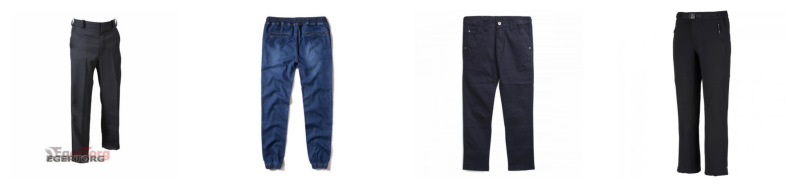

model: Xception; metric: manhattan
Found existing representations
No changes detected. No update required.
Found existing annoy index
Done. Please apply search now.
1/1 [==============================] - 1s 687ms/step


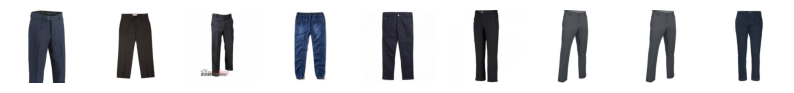



Селекция одежды по основному цвету:


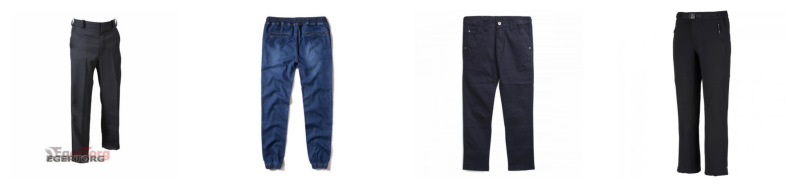

model: Xception; metric: hamming
Found existing representations
No changes detected. No update required.
Found existing annoy index
Done. Please apply search now.
1/1 [==============================] - 1s 1s/step


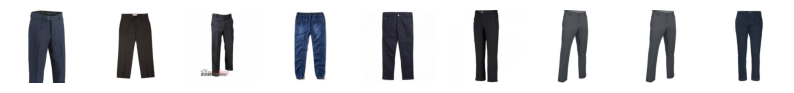



Селекция одежды по основному цвету:


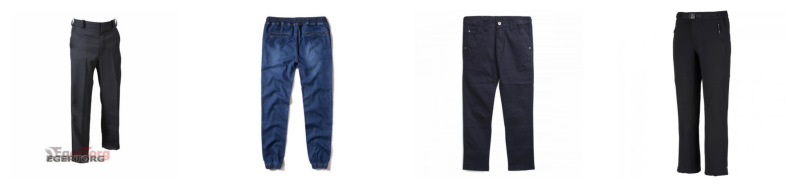

model: Xception; metric: dot
Found existing representations
No changes detected. No update required.
Found existing annoy index
Done. Please apply search now.
1/1 [==============================] - 1s 712ms/step


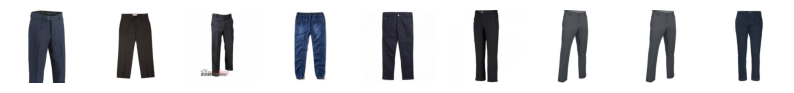



Селекция одежды по основному цвету:


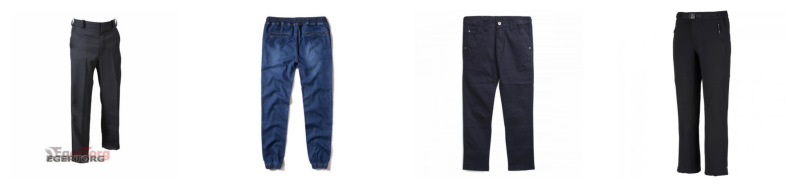

In [ ]:
models = ['VGG16', 'ResNet50', 'InceptionV3', 'Xception']
metrics = ['angular', 'euclidean', 'manhattan', 'hamming', 'dot']

file = np.random.choice(os.listdir('/content/DataSet'))
path = '/content/DataSet/' + file

image = Image.open(path)
plt.imshow(image)
plt.axis('off')
plt.grid('off')
plt.show()

colour = get_colour(img)
print('Основной цвет элемента одежды:', colour)

for model in models:
  for metric in metrics:
    print(f'model: {model}; metric: {metric}')
    elems = search_elems(path)
    similar_images = [Image.open(elem['image_path']) for elem in elems]
    fig, ax = plt.subplots(1, len(similar_images)-1, figsize=(10, 10))
    for n, img in enumerate(similar_images[1:]):
      ax[n].imshow(img)
      ax[n].axis('off')
      ax[n].grid('off')
    plt.show()

    print('\n\nСелекция одежды по основному цвету:')
    img_list = choose_clothers(colour, similar_images, lim=5)
    if len(img_list) > 2:
      fig, ax = plt.subplots(1, len(img_list)-1, figsize=(10, 10))
      for n, img in enumerate(img_list[1:]):
        ax[n].imshow(img)
        ax[n].axis('off')
        ax[n].grid('off')
      plt.show()
    elif len(img_list) == 2:
      plt.imshow(img_list[1])
      plt.axis('off')
      plt.grid('off')
      plt.show()
    else:
      print('Нет похожих элементов одежды.')

Вывод: на разных моделях и с разными метриками выдает одинаковый результат.